In [112]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [113]:
df = pd.read_csv("stroke_data.csv")

In [114]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [115]:

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df = df.drop(df.index[df['age'] < 0])
df = df.head(35000)
df = df[['hypertension', 'avg_glucose_level', 'heart_disease', 'age', 'bmi', 'work_type', 'stroke']]

In [116]:

y = df['stroke']
X = df.drop(['stroke'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape)
# print(X_test.shape)

In [117]:
# scale the x values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [119]:

# instantiate the model
# logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg = LogisticRegression()


In [120]:
# tune hyperparameters with GridSearchCV
logreg_tuned = GridSearchCV(logreg, param_grid={'C': np.logspace(-4,4,9), 'penalty':['l1','l2'], 'solver': ['liblinear']}, cv=10)

# fit the model
logreg_tuned.fit(X_train_scaled, y_train)

# Step 4: Evaluate the model
# p_pred = model.predict_proba(x)
y_pred = logreg_tuned.predict(X_test_scaled)
# score_ = model.score(x, y)
# conf_m = confusion_matrix(y, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      2920
           1       0.72      0.65      0.69      4080

    accuracy                           0.65      7000
   macro avg       0.65      0.65      0.65      7000
weighted avg       0.66      0.65      0.65      7000



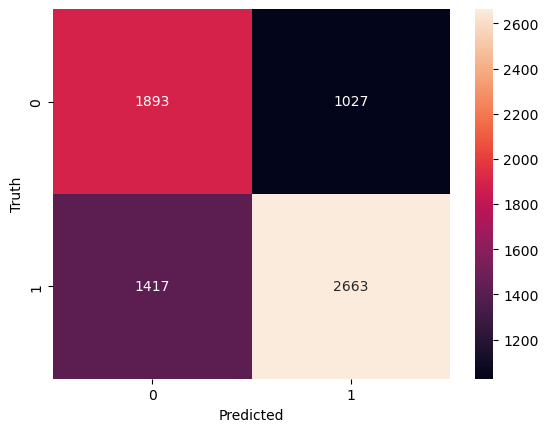

In [121]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [122]:
# calculate cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [123]:
y_val_pred = cross_val_predict(logreg_tuned, X_test_scaled, y_test, cv=10)
report = classification_report(y_test, y_val_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.73      0.64      2920
           1       0.76      0.61      0.68      4080

    accuracy                           0.66      7000
   macro avg       0.67      0.67      0.66      7000
weighted avg       0.68      0.66      0.67      7000



In [124]:
# check accuracy for different hyperparameters
from sklearn.metrics import accuracy_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does no

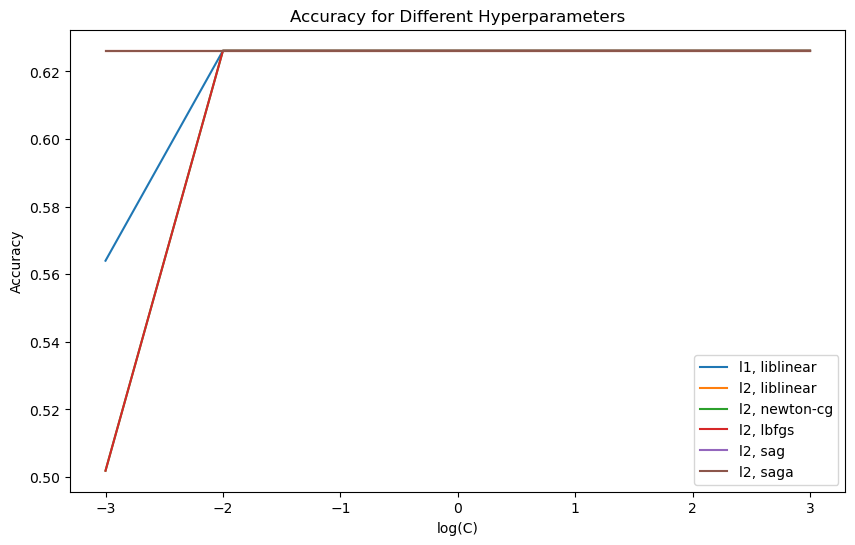

In [130]:

# Define the hyperparameters to test
C_values = np.logspace(-3, 3, 7)
# C_values = [0.001, 0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']
solvers = ['liblinear']
penalty_solvers = [
    ('l1', 'liblinear'),
    ('l2', 'liblinear'),
    ('l2', 'newton-cg'),
    ('l2', 'lbfgs'),
    ('l2', 'sag'),
    ('l2', 'saga')
]

results = []

for C in C_values:
    for penalty_solve in penalty_solvers:
        penalty, solver = penalty_solve
        # Train a logistic regression model with the current hyperparameters
        clf = LogisticRegression(C=C, penalty=penalty, solver=solver)
        clf.fit(X_train, y_train)
        
        # predict the labels for the validation set
        y_pred = clf.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'C': C,
            'penalty': penalty,
            'solver': solver,
            'accuracy': accuracy
        })

results_df = pd.DataFrame(results)

# plot the accuracy scores for each hyperparameters
plt.figure(figsize=(10, 6))
for penalty_solve in penalty_solvers:
    penalty, solver = penalty_solve
    subset = results_df[(results_df['penalty'] == penalty) & (results_df['solver'] == solver)]
    plt.plot(np.log10(subset['C']), subset['accuracy'], label=f'{penalty}, {solver}')

plt.xlabel('log(C)')
# plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Hyperparameters')
plt.legend()
plt.show()

In [ ]:
# 